In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import re
import seaborn as sns
import numpy as np

We have been working on understanding what was the best measure of biodiversity (species counts or genetic diversity) in other files. 

We think genetic diversity might be the best way of dealing with the problem of species definition. So we are committed to use this metric for the rest of our analysis, however, we need to make sure we have reached equilibrium at 50000 iteration or not (this is true for the species counts but we are not sure if it is true for the genetic diversity).

When running a simulation we do not get info on the species genome at iteration 50, 100, 250 etc. but we only have an end of log run with the individuals data, so it means that to test at which iteration we have equilibrium we have to run a batch that will finish at 10K and get the mean diversity at the end of the run, then another batch that ends at 20K and so on, so that we can kinda recreate the curve that we have been creating before with the log run with species counts. 

In [8]:
# Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/5k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/10k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/15k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/20k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/25k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/30k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/40k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/50k',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/gendiv/60k',]
folder_labels = [5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000]

In [3]:
# Creating a function to calculate genetic diversity among pairs
# I will use this one to calculate the average diversity of the sample
def average_diversity_simulation(genomes, num_pairs):
    # Select random pairs of indices
    random_indices = random.sample(range(len(genomes)), 2 * num_pairs)

    # Initialize a counter for differences
    differences_count = 0

    # Compare strings in random pairs
    for i in range(0, len(random_indices), 2):
        index1, index2 = random_indices[i], random_indices[i + 1]
        string1, string2 = genomes.iloc[index1], genomes.iloc[index2]

        # Compare strings and count differences
        differences_count = differences_count + sum(c1 != c2 for c1, c2 in zip(string1, string2))

    # Calculate the average differences per pair
    average_differences = differences_count / num_pairs

    return average_differences

In [12]:
# Running through all files in each folder and calculating the average diversity for each iteration number
# Initialize an empty list to store dictionaries
results_list = []

for i, folder_path in enumerate(folder_paths):
    # Loop through files in the folder
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            
            # import data 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            genomes = df['Genome']
            # keep the first 32 bits from each genome
            genomes = df['Genome'].str[:32]
            
            #remove the first 32 and keep the last (non-coding genome)
            #genomes = df['Genome'].str[32:]
          
            # Calculate average differences for the current file
            diversity = average_diversity_simulation(genomes, len(genomes)//2)

            # Append dictionary to the list
            result_dict = {'File': filename, 'Folder': folder_labels[i], 'AverageDiversity': diversity, 'Pairs':len(genomes)//2}
            results_list.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)
mean_div = results_df.groupby('Folder')['AverageDiversity'].mean().reset_index()

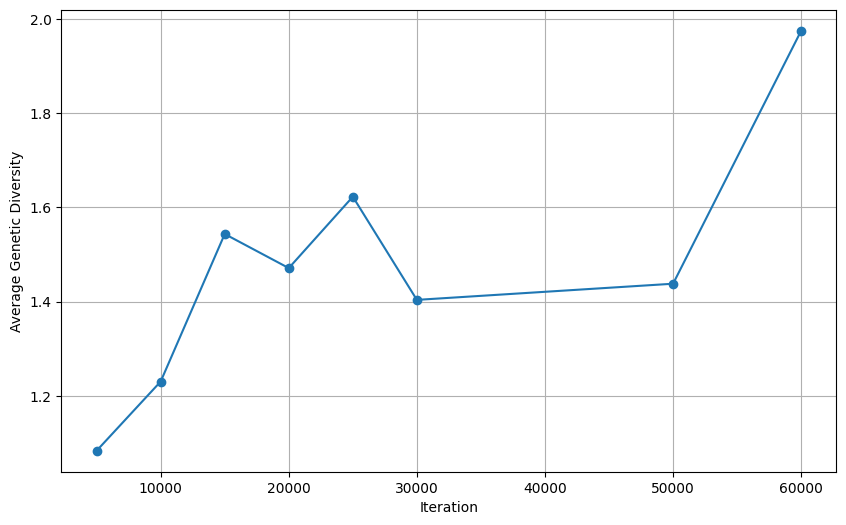

In [9]:
# made a graph with iteration number of the x axis and diversity  on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(mean_div['Folder'], mean_div['AverageDiversity'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Average Genetic Diversity')
plt.grid(True)
plt.show()
#non-coding genome

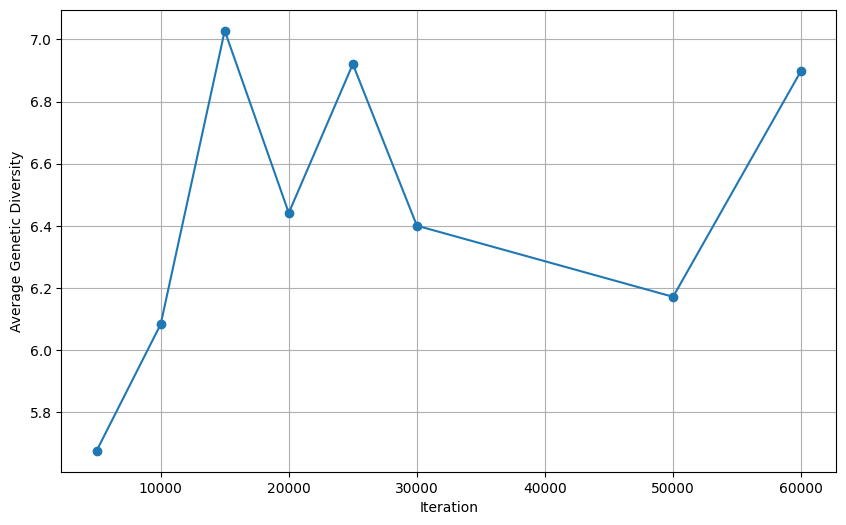

In [11]:
# made a graph with iteration number of the x axis and diversity  on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(mean_div['Folder'], mean_div['AverageDiversity'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Average Genetic Diversity')
plt.grid(True)
plt.show()
# all 64-bits genome

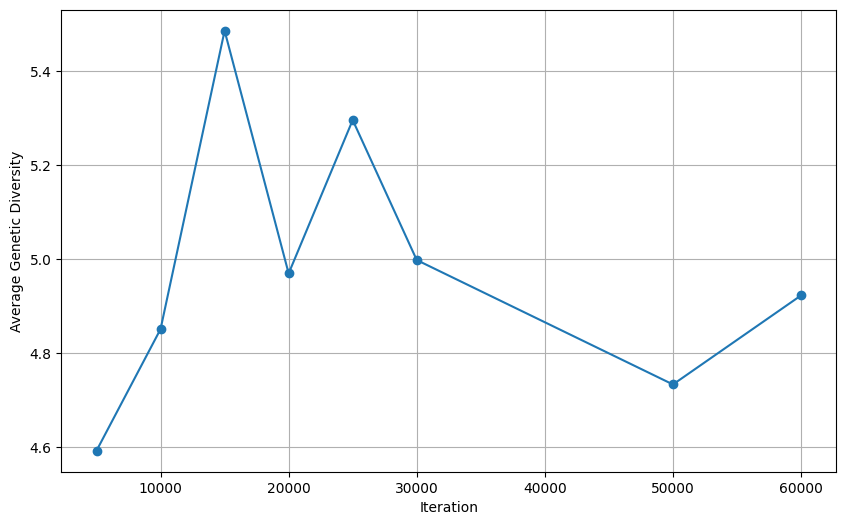

In [13]:
# made a graph with iteration number of the x axis and diversity  on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(mean_div['Folder'], mean_div['AverageDiversity'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Average Genetic Diversity')
plt.grid(True)
plt.show()
#coding genome